# Feature Engineering

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import xgboost as xgb
import itertools
import time
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
# iMac
data = Path('/Users/z/Library/Mobile Documents/com~apple~CloudDocs/DATA SCIENCE PROJECTS/Cars/Data Prep & Cleaning')
car_data_df = pd.read_csv(data / 'car_data_cleaned.csv')
print('Data imported')

Data imported


In [ ]:
car_data_df.drop(columns=['Listing ID'], inplace=True) # Listing id's are irrelevant
car_data_df.drop(columns=['Stock Type'], inplace=True) # All stock type is 'used' 
print('Columns dropped')

Columns dropped


## Testing Feature Combinations

In [ ]:
predictor_options = ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style', 'City']
start_time_full = time.time()

def xgboost_with_predictor_combinations(car_data_df, target, predictor_options):
    """
    Train and evaluate an XGBoost model using different combinations of predictors.
    """
    results = []
    for r in range(2, len(predictor_options) + 1):
        for combo in itertools.combinations(predictor_options, r):
            combo_list = list(combo)
            print(f"Running XGBoost with predictors: {combo_list}")

            X = pd.get_dummies(car_data_df[combo_list], drop_first=False).values
            y = car_data_df[target].values.reshape(-1, 1)
            
            column_names = pd.get_dummies(car_data_df[combo_list], drop_first=False)
            
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns)
            
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
            
            start_time = time.time()
            
            XGBoost_model = xgb.XGBRegressor() # Using XGBoost because it performed the faster & more accurate in other iterations
            XGBoost_model.fit(X_train, y_train.ravel())
            
            pred_XGBoost = XGBoost_model.predict(X_test)
            
            mae = metrics.mean_absolute_error(y_test, pred_XGBoost)
            mse = metrics.mean_squared_error(y_test, pred_XGBoost)
            r2 = metrics.r2_score(y_test, pred_XGBoost)
            
            end_time = time.time()
            elapsed_time = (end_time - start_time)
            
            results.append({
                'predictors': combo_list,
                'MAE': mae,
                'MSE': mse,
                'R2': r2,
                'time': elapsed_time
            })
            
            print("\033[1mXGBoost Performance:\033[0m")
            print("Mean Absolute Error (MAE): ", mae)
            print("Mean Squared Error  (MSE): ", mse)
            print("R2 Score             (R2): ", r2)
            print(f"{elapsed_time:.1f} seconds to execute.\n")
    
    return results

results = xgboost_with_predictor_combinations(car_data_df, 'Price', predictor_options)

end_time_full = time.time()
elapsed_time_full = (end_time_full - start_time_full) / 60
print(f"{elapsed_time_full:.1f} minutes to execute.\n")


Running XGBoost with predictors: ['Year', 'Model']
XGBoost Performance:
Mean Absolute Error (MAE):  3381.946241268632
Mean Squared Error  (MSE):  24371361.735016577
R2 Score             (R2):  0.8593280138865835
1.1 seconds to execute.

Running XGBoost with predictors: ['Year', 'State']
XGBoost Performance:
Mean Absolute Error (MAE):  7554.120462263942
Mean Squared Error  (MSE):  112601405.05193835
R2 Score             (R2):  0.35006244377970597
0.5 seconds to execute.

Running XGBoost with predictors: ['Year', 'Mileage']
XGBoost Performance:
Mean Absolute Error (MAE):  7598.540861694564
Mean Squared Error  (MSE):  113224146.63964528
R2 Score             (R2):  0.34646796691252746
0.6 seconds to execute.

Running XGBoost with predictors: ['Year', 'Trim']
XGBoost Performance:
Mean Absolute Error (MAE):  4701.459012544506
Mean Squared Error  (MSE):  47019175.626748815
R2 Score             (R2):  0.7286043803072786
1.7 seconds to execute.

Running XGBoost with predictors: ['Year', 'Make']

## Top Performing Models at 6, 7, & 8 Predictors

Model Performance with 6 Predictors:
Mean Absolute Error (MAE):  2236.8116024064066
Mean Squared Error  (MSE):  10459830.546105463
R2 Score             (R2):  0.9396256494270349
2.7 seconds to execute.



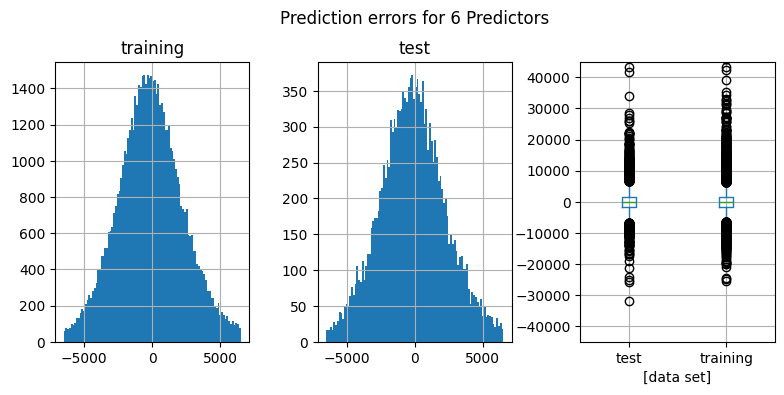

Model Performance with 7 Predictors:
Mean Absolute Error (MAE):  2216.44419821337
Mean Squared Error  (MSE):  10367387.055782594
R2 Score             (R2):  0.9401592350973133
2.5 seconds to execute.



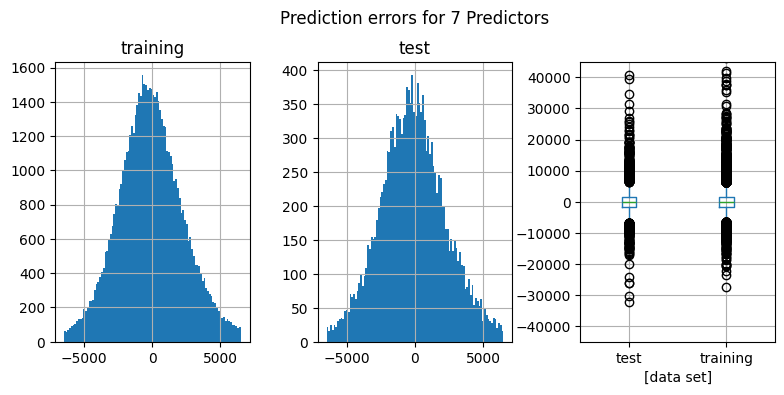

Model Performance with 8 Predictors:
Mean Absolute Error (MAE):  2201.7800213263195
Mean Squared Error  (MSE):  10192004.88482754
R2 Score             (R2):  0.9411715444867259
11.4 seconds to execute.



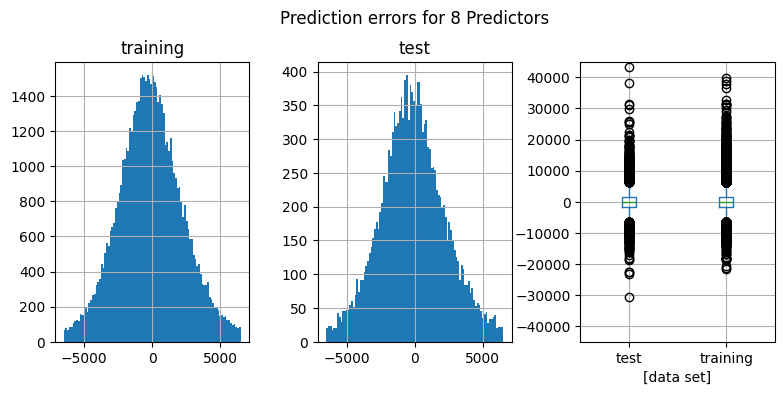

In [ ]:
feature_selection_options = {
    "6 Predictors": ['Year', 'Model', 'Mileage', 'Trim', 'Make', 'Body Style'],
    "7 Predictors": ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style'],
    "8 Predictors": ['Year', 'Model', 'State', 'Mileage', 'Trim', 'Make', 'Body Style', 'City']
}

for name, predictors in feature_selection_options.items():
    X = pd.get_dummies(car_data_df[predictors], drop_first=False).values
    y = car_data_df['Price'].values.reshape(-1, 1)

    column_names = pd.get_dummies(car_data_df[predictors], drop_first=False)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=column_names.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=1)

    start_time = time.time()

    XGBoost_model = xgb.XGBRegressor()
    XGBoost_model.fit(X_train, y_train.ravel())

    y_pred_XGBoost = XGBoost_model.predict(X_test)

    print(f"\033[1mModel Performance with {name}:\033[0m")
    print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_XGBoost))
    print("Mean Squared Error  (MSE): ", metrics.mean_squared_error(y_test, y_pred_XGBoost))
    print("R2 Score             (R2): ", metrics.r2_score(y_test, y_pred_XGBoost))

    end_time = time.time()
    elapsed_time = (end_time - start_time)
    print(f"{elapsed_time:.1f} seconds to execute.\n")

    
    # Plotting prediction errors (residuals)
    train_predictions = XGBoost_model.predict(X_train).flatten()
    test_predictions = XGBoost_model.predict(X_test).flatten()

    pred_error_train = pd.DataFrame({
        'residual': (y_train.flatten() - train_predictions), 
        'data set': 'training'
    })
    pred_error_test = pd.DataFrame({
        'residual': (y_test.flatten() - test_predictions), 
        'data set': 'test'
    })
    boxdata_df = pd.concat([pred_error_train, pred_error_test], ignore_index=True)

    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(9, 4)
    common = {'bins': 100, 'range': [-6500, 6500]}
    pred_error_train.hist(ax=axes[0], **common)
    pred_error_test.hist(ax=axes[1], **common)
    boxdata_df.boxplot(ax=axes[2], by='data set')

    axes[0].set_title('training')
    axes[1].set_title('test')
    axes[2].set_title(' ')
    axes[2].set_ylim(-45000, 45000)
    plt.suptitle(f'Prediction errors for {name}') 
    plt.subplots_adjust(bottom=0.15, top=0.85, wspace=0.35)

    plt.show()

# Conclusion

### 7 predictors strikes the best balance between model performance and simplicity, with a slightly lower MAE and MSE than 6 predictors, while maintaining a high R2 score. Although the model with 8 predictors provides marginally better performance, the difference is minimal, and reducing the number of predictors can help prevent overfitting. I will therefore proceed with 7 predictors for the final model, ensuring optimal results with a reduced risk of overfitting. 